# Task 2

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import openpyxl

In [4]:
path = '/workspaces/codespaces-jupyter/data/QVI_data.csv'


In [5]:
try:
    df = pd.read_csv(path)
except FileNotFoundError:
    print('ruta no encontrada')

In [6]:
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [7]:
total_sales = sum(df['TOT_SALES'])
print(total_sales)

1139735.9


In [9]:
df.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,156683.000000,156683.000000,156683.000000,156683.000000,156683.000000,156683.000000,156683.000000
mean,80720.401416,80.545732,79977.847176,56.590383,1.906442,7.274152,182.234033
std,44366.651481,44.360086,46157.335159,32.809309,0.341938,2.519050,64.038412
min,1000.000000,1.000000,1.000000,1.000000,1.000000,1.500000,70.000000
25%,43204.000000,43.000000,40012.500000,28.000000,2.000000,5.400000,150.000000
50%,81060.000000,81.000000,79999.000000,56.000000,2.000000,7.400000,170.000000
75%,116127.000000,116.000000,119913.500000,85.000000,2.000000,8.800000,175.000000
max,157236.000000,157.000000,159917.000000,114.000000,5.000000,29.500000,380.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156683 entries, 0 to 156682
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    156683 non-null  int64  
 1   DATE              156683 non-null  object 
 2   STORE_NBR         156683 non-null  int64  
 3   TXN_ID            156683 non-null  int64  
 4   PROD_NBR          156683 non-null  int64  
 5   PROD_NAME         156683 non-null  object 
 6   PROD_QTY          156683 non-null  int64  
 7   TOT_SALES         156683 non-null  float64
 8   PACK_SIZE         156683 non-null  int64  
 9   BRAND             156683 non-null  object 
 10  LIFESTAGE         156683 non-null  object 
 11  PREMIUM_CUSTOMER  156682 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 14.3+ MB


In [22]:
#### Calculate these measures over time for each store
#### Over to you! Add a new month ID column in the data with the format yyyymm.
# DATE is type object, so i need to change it to DATETYPE
df['DATE'] = pd.to_datetime(df['DATE'])
# 2. Add the 'month' column using .dt.strftime()
df['YEAR_MONTH'] = df['DATE'].dt.strftime('%Y%m')
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEAR_MONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811


In [24]:
# build month sales
monthly = (
    df.groupby(["STORE_NBR","YEAR_MONTH"])
    .agg(
        totSales=("TOT_SALES", "sum"),
        nCustomers=("LYLTY_CARD_NBR", "nunique"),
        nTxn=("TXN_ID", "nunique"),
        totChips=("PROD_QTY", "sum")

    )
    .reset_index()
)

In [26]:
# metricas derivadas
monthly["nTxnPerCust"] = monthly["nTxn"] / monthly["nCustomers"]
monthly["nChipsPerTxn"] = monthly["totChips"] / monthly["nTxn"]
monthly["avgPricePerUnit"] = monthly["totSales"] / monthly["totChips"]
monthly.head()

,STORE_NBR,YEAR_MONTH,totSales,nCustomers,nTxn,totChips,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,52,62,1.061224,1.192308,3.337097
1,1,201808,176.1,42,43,54,1.023810,1.255814,3.261111
2,1,201809,278.8,59,62,75,1.050847,1.209677,3.717333
3,1,201810,188.1,44,45,58,1.022727,1.288889,3.243103
4,1,201811,192.6,46,47,57,1.021739,1.212766,3.378947


In [29]:
TRIAL_STORES = [77,86,88]
pre_end = 201902 # exclusivo (todo < 201902)
trial_start = 201902
trial_end = 201904 #inclusivo

# ensure YEAR_MONTH is numeric so comparisons work
monthly['YEAR_MONTH'] = monthly['YEAR_MONTH'].astype(int)

pre = monthly[monthly['YEAR_MONTH'] < pre_end ].copy()

# meses esperados en pre-trial (para exigir "presente todo el periodo")
expected_months = set(pre['YEAR_MONTH'])

#tiendas con cobertura completa del pre-trial
coverage = pre.groupby("STORE_NBR")["YEAR_MONTH"].apply(set)
eligible_stores = [s for s, months in coverage.items() if months == expected_months]

# candidatos: elegibles y No trial
candidates  = [s for s in eligible_stores if s not in TRIAL_STORES]
len(candidates), candidates[:10]

(147, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [30]:
def pick_control_store(trial_store, pre_df, candidate_stores,
                       metrics=("totSales", "nCustomers", "nTxnPerCust")):
    # Pivot: index=YEARMONTH, columns=STORE_NBR
    pivots = {}
    for m in metrics:
        pivots[m] = pre_df.pivot(index="YEAR_MONTH", columns="STORE_NBR", values=m)

    # Serie del trial
    trial_series = {m: pivots[m][trial_store].dropna() for m in metrics}

    rows = []
    for c in candidate_stores:
        # asegurar alineación por meses
        ok = True
        corr_list = []
        dist_list = []

        for m in metrics:
            if c not in pivots[m].columns:
                ok = False
                break
            s_trial = trial_series[m]
            s_c = pivots[m][c].dropna()

            common_idx = s_trial.index.intersection(s_c.index)
            if len(common_idx) < 2:
                ok = False
                break

            a = s_trial.loc[common_idx].values
            b = s_c.loc[common_idx].values

            # Pearson corr
            corr = np.corrcoef(a, b)[0, 1]
            corr_list.append(corr)

            # Distancia en magnitud (Euclidiana)
            dist = np.linalg.norm(a - b)
            dist_list.append(dist)

        if not ok:
            continue

        rows.append({
            "candidate": c,
            "corr_avg": float(np.nanmean(corr_list)),
            "dist_avg": float(np.nanmean(dist_list))
        })

    score = pd.DataFrame(rows).dropna()

    # Normalizar distancia a score (alto=mejor)
    dmin, dmax = score["dist_avg"].min(), score["dist_avg"].max()
    if dmax == dmin:
        score["magnitude_score"] = 1.0
    else:
        score["magnitude_score"] = 1 - (score["dist_avg"] - dmin) / (dmax - dmin)

    # Score final: promedio simple (puedes ponderar distinto)
    score["final_score"] = (score["corr_avg"] + score["magnitude_score"]) / 2

    score = score.sort_values("final_score", ascending=False).reset_index(drop=True)
    return score

# Elegir control para cada tienda trial
control_map = {}
for ts in TRIAL_STORES:
    ranking = pick_control_store(ts, pre, candidates)
    control_map[ts] = int(ranking.loc[0, "candidate"])
    print(ts, "-> control:", control_map[ts], "top5:", ranking.head(5)[["candidate","final_score","corr_avg","magnitude_score"]].to_string(index=False))


/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


77 -> control: 37 top5:  candidate  final_score  corr_avg  magnitude_score
        37     0.806119  0.757986         0.854253
       115     0.779965  0.625827         0.934102
        84     0.754360  0.690345         0.818374
        50     0.713019  0.442230         0.983808
        17     0.706073  0.536917         0.875230
86 -> control: 138 top5:  candidate  final_score  corr_avg  magnitude_score
       138     0.822591  0.684236         0.960946
       155     0.791174  0.583328         0.999020
       114     0.778408  0.605435         0.951381
        32     0.725549  0.513969         0.937128
       109     0.701231  0.402462         1.000000
88 -> control: 106 top5:  candidate  final_score  corr_avg  magnitude_score
       106     0.738325  0.691901         0.784748
       113     0.646431  0.530227         0.762636
        69     0.644432  0.493351         0.795513
       123     0.641536  0.352938         0.930133
        91     0.626540  0.513253         0.739826


/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [31]:
def trial_vs_control(monthly_df, trial_store, control_store,
                     trial_start=201902, trial_end=201904):
    sub = monthly_df[monthly_df["STORE_NBR"].isin([trial_store, control_store])].copy()

    # Sales por mes
    sales = sub.pivot(index="YEAR_MONTH", columns="STORE_NBR", values="totSales").sort_index()
    sales = sales.dropna()  # meses completos

    pre_mask = sales.index < trial_start
    trial_mask = (sales.index >= trial_start) & (sales.index <= trial_end)

    trial_pre = sales.loc[pre_mask, trial_store]
    ctrl_pre  = sales.loc[pre_mask, control_store]

    # Escalamiento (matching nivel pre-trial)
    scaling = trial_pre.sum() / ctrl_pre.sum()
    ctrl_adj = sales[control_store] * scaling

    # Diferencias
    diff_pre = sales.loc[pre_mask, trial_store] - ctrl_adj.loc[pre_mask]
    diff_trial = sales.loc[trial_mask, trial_store] - ctrl_adj.loc[trial_mask]

    # Intervalo 95% basado en pre-trial (aprox normal)
    mu = diff_pre.mean()
    sd = diff_pre.std(ddof=1)
    upper = mu + 1.96 * sd
    lower = mu - 1.96 * sd

    out_of_band = (diff_trial > upper) | (diff_trial < lower)

    result = pd.DataFrame({
        "trial_sales": sales[trial_store],
        "control_sales": sales[control_store],
        "control_adj_sales": ctrl_adj,
        "diff": sales[trial_store] - ctrl_adj,
        "is_trial_period": trial_mask
    })

    summary = {
        "trial_store": trial_store,
        "control_store": control_store,
        "scaling_factor": float(scaling),
        "pretrial_diff_mean": float(mu),
        "pretrial_diff_sd": float(sd),
        "trial_months_outside_95pct_band": int(out_of_band.sum()),
        "trial_months_total": int(trial_mask.sum())
    }
    bands = {"lower": float(lower), "upper": float(upper)}
    return result, summary, bands

# Ejecutar para tus 3 trials
outputs = {}
for ts in TRIAL_STORES:
    cs = control_map[ts]
    res, summ, bands = trial_vs_control(monthly, ts, cs, trial_start, trial_end)
    outputs[ts] = (res, summ, bands)
    print(summ, "bands:", bands)


{'trial_store': 77, 'control_store': 37, 'scaling_factor': 0.559337562881394, 'pretrial_diff_mean': 0.0, 'pretrial_diff_sd': 33.59350944038498, 'trial_months_outside_95pct_band': 0, 'trial_months_total': 3} bands: {'lower': -65.84327850315455, 'upper': 65.84327850315455}
{'trial_store': 86, 'control_store': 138, 'scaling_factor': 0.9678712636406768, 'pretrial_diff_mean': 1.4616879135636348e-13, 'pretrial_diff_sd': 68.88383972320855, 'trial_months_outside_95pct_band': 1, 'trial_months_total': 3} bands: {'lower': -135.0123258574886, 'upper': 135.0123258574889}
{'trial_store': 88, 'control_store': 106, 'scaling_factor': 1.4070402113429845, 'pretrial_diff_mean': -6.496390726949487e-14, 'pretrial_diff_sd': 136.816789729972, 'trial_months_outside_95pct_band': 1, 'trial_months_total': 3} bands: {'lower': -268.1609078707451, 'upper': 268.160907870745}


In [33]:
def build_metric_series(monthly_df, metric, trial_store, control_store, trial_start=201902, trial_end=201904):
    sub = monthly_df[monthly_df["STORE_NBR"].isin([trial_store, control_store])].copy()
    mat = sub.pivot(index="YEAR_MONTH", columns="STORE_NBR", values=metric).sort_index().dropna()

    pre_mask = mat.index < trial_start

    scaling = mat.loc[pre_mask, trial_store].sum() / mat.loc[pre_mask, control_store].sum()
    ctrl_adj = mat[control_store] * scaling

    out = pd.DataFrame({
        "trial": mat[trial_store],
        "control_adj": ctrl_adj
    })
    out["diff"] = out["trial"] - out["control_adj"]
    out["is_trial_period"] = (out.index >= trial_start) & (out.index <= trial_end)
    return out, scaling

for ts in TRIAL_STORES:
    cs = control_map[ts]
    cust_series, _ = build_metric_series(monthly, "nCustomers", ts, cs, trial_start, trial_end)
    txnpc_series, _ = build_metric_series(monthly, "nTxnPerCust", ts, cs, trial_start, trial_end)

    print(f"\nTrial {ts} vs Control {cs}")
    print("Δ clientes (trial period):")
    print(cust_series[cust_series["is_trial_period"]][["diff"]])
    print("Δ txn por cliente (trial period):")
    print(txnpc_series[txnpc_series["is_trial_period"]][["diff"]])



Trial 77 vs Control 37
Δ clientes (trial period):
                 diff
YEAR_MONTH           
201902      10.481366
201903      11.055901
201904       7.170807
Δ txn por cliente (trial period):
                diff
YEAR_MONTH          
201902     -0.065191
201903     -0.074427
201904     -0.059503

Trial 86 vs Control 138
Δ clientes (trial period):
                 diff
YEAR_MONTH           
201902      19.632312
201903      12.100279
201904       2.100279
Δ txn por cliente (trial period):
                diff
YEAR_MONTH          
201902      0.062816
201903     -0.077708
201904     -0.001251

Trial 88 vs Control 106
Δ clientes (trial period):
                 diff
YEAR_MONTH           
201902      10.876676
201903       6.882038
201904      16.042895
Δ txn por cliente (trial period):
                diff
YEAR_MONTH          
201902      0.059718
201903      0.056916
201904      0.129512


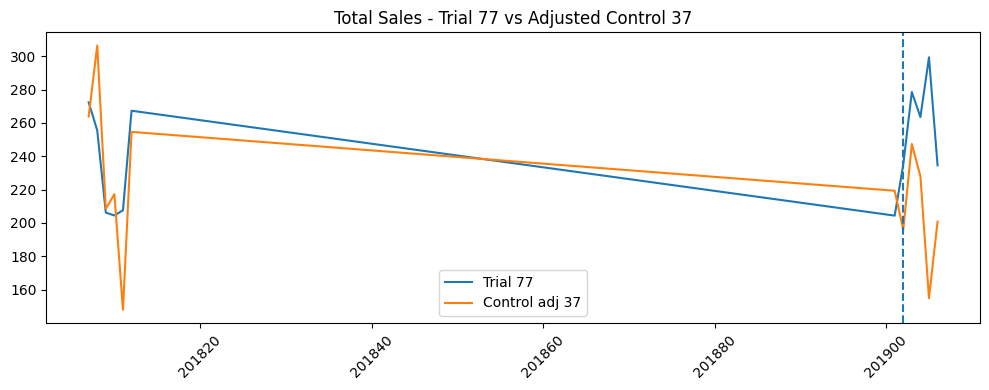

In [34]:
import matplotlib.pyplot as plt

ts = 77
cs = control_map[ts]
res, summ, bands = outputs[ts]

plt.figure(figsize=(10,4))
plt.plot(res.index, res["trial_sales"], label=f"Trial {ts}")
plt.plot(res.index, res["control_adj_sales"], label=f"Control adj {cs}")
plt.axvline(trial_start, linestyle="--")
plt.title(f"Total Sales - Trial {ts} vs Adjusted Control {cs}")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
